**Importing Library**

In [27]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [28]:
import os
os.listdir('./data')

['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

**Loading Images**

In [29]:
from PIL import Image

def load_images(path):
    imgs = list()
    label = list()
    
    for folder in os.listdir(path):
        subpath = path + '/' + folder
        for image in os.listdir(subpath):
            img = Image.open(subpath + '/' + image).convert('RGB')
            img = img.resize(size=(32, 32))
            imgs.append(np.array(img))
            label.append(folder)
            del img
    
    plt.figure(figsize = (5, 5))
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.imshow(imgs[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(imgs), label

# Dataset Pre-Processing

**Fetching Images & Applying Normalization on Images**

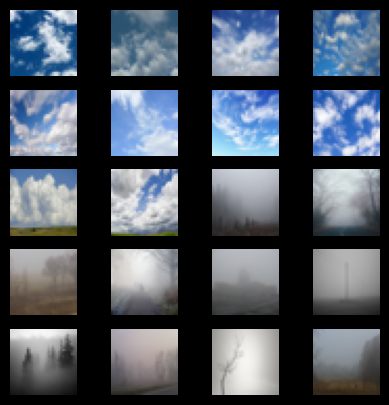

((50, 32, 32, 3), 50)

In [30]:
x, y = load_images('./data')
x = x/255.0
x.shape, len(y)

**Reshaping all the images**

In [31]:
nsamples, nx, ny, nrgb = x.shape
x_new = x.reshape((nsamples, nx * ny * nrgb))
x_new.shape

(50, 3072)

**Applying Label Encoding**

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_new = label_encoder.fit_transform(y)
x_new.shape, y_new.shape

((50, 3072), (50,))

In [33]:
# df = pd.DataFrame(np.c_[x_new, y_new])
# df

**Split Dataset into training & testing data**

In [34]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_new, y_new, test_size=0.25, random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((37, 3072), (13, 3072), (37,), (13,))

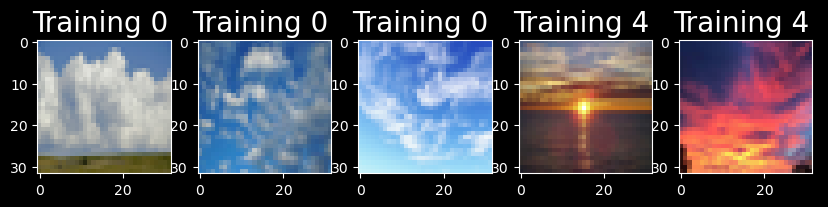

In [35]:
plt.figure(figsize = (10, 10))
for index, (image, label) in enumerate(zip(train_x[:5], train_y[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('Training %d ' % label, fontsize=20)
    plt.plot

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

**solver = "newton-cg"**

In [37]:
lgr_newton = LogisticRegression(solver="newton-cg")
lgr_newton.fit(train_x, train_y)
print(test_y)
print(lgr_newton.predict(test_x))
print(lgr_newton.score(test_x, test_y))

[1 3 3 4 1 4 2 2 3 1 1 0 3]
[1 1 0 4 1 1 2 0 3 1 1 0 0]
0.6153846153846154


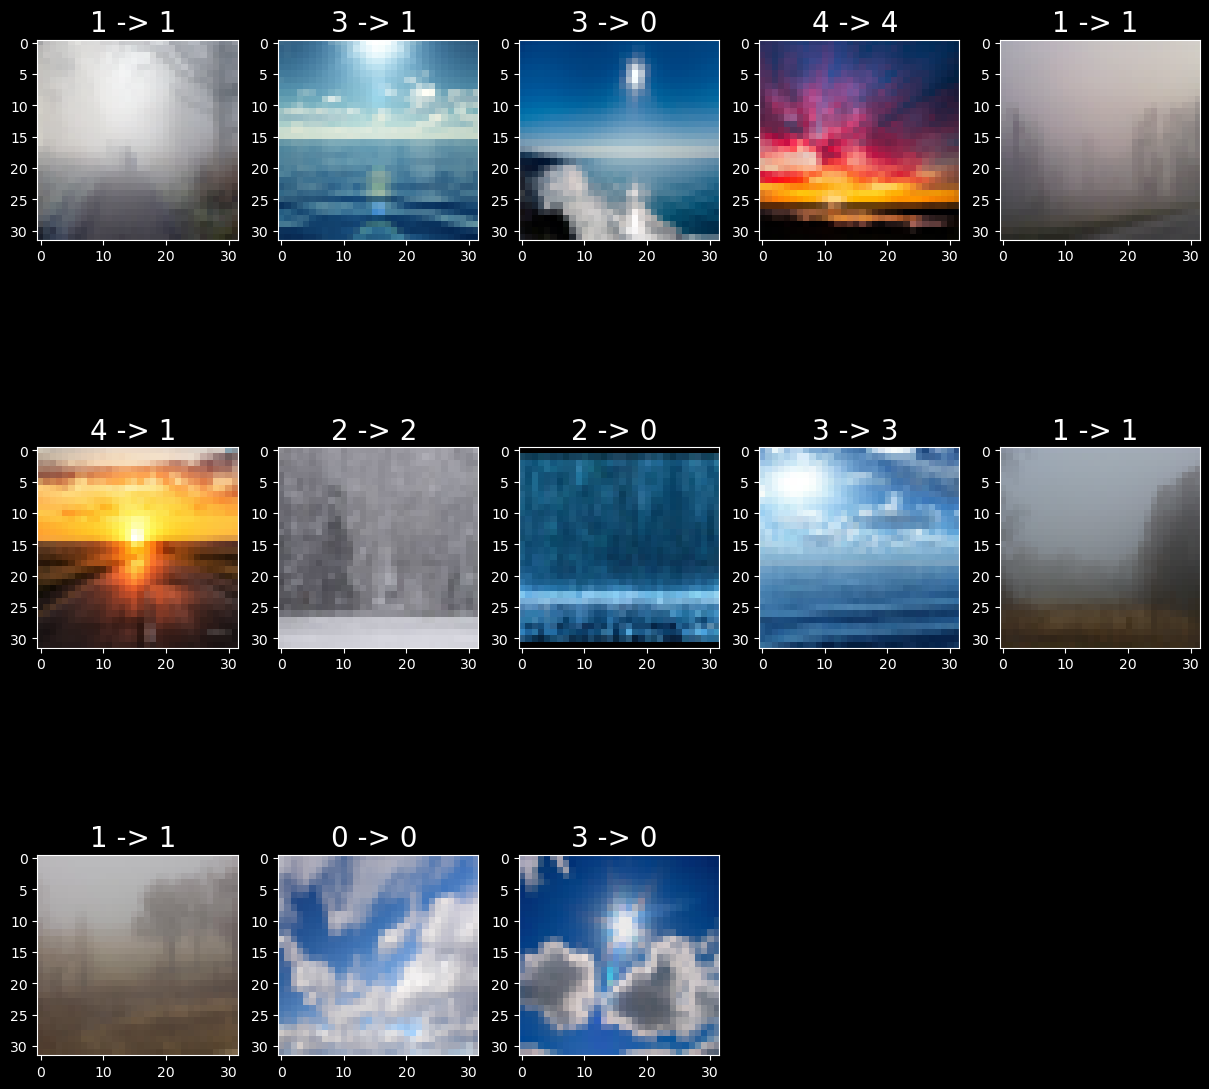

In [38]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_newton.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

**solver = "lbfgs"**

In [39]:
lgr_lbfgs = LogisticRegression(solver="lbfgs")
lgr_lbfgs.fit(train_x, train_y)
print(test_y)
print(lgr_lbfgs.predict(test_x))
print(lgr_lbfgs.score(test_x, test_y))

[1 3 3 4 1 4 2 2 3 1 1 0 3]
[1 1 0 4 1 4 2 0 3 1 1 0 0]
0.6923076923076923


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


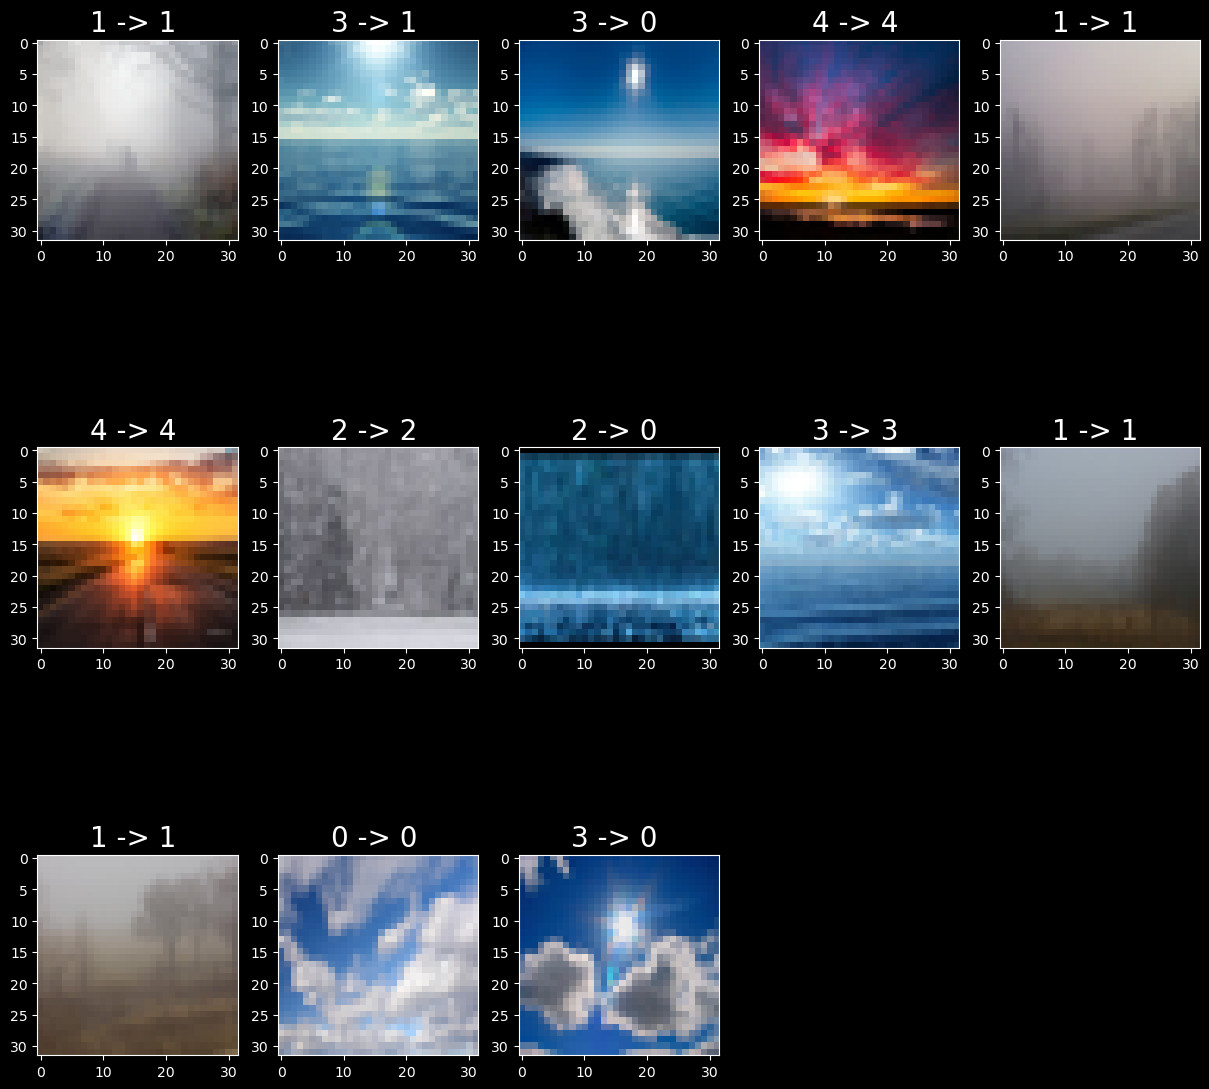

In [40]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_lbfgs.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

**solver = "liblinear"**

In [41]:
lgr_liblinear = LogisticRegression(solver="liblinear")
lgr_liblinear.fit(train_x, train_y)
print(test_y)
print(lgr_liblinear.predict(test_x))
print(lgr_liblinear.score(test_x, test_y))

[1 3 3 4 1 4 2 2 3 1 1 0 3]
[1 1 0 4 1 4 2 0 3 1 1 0 0]
0.6923076923076923


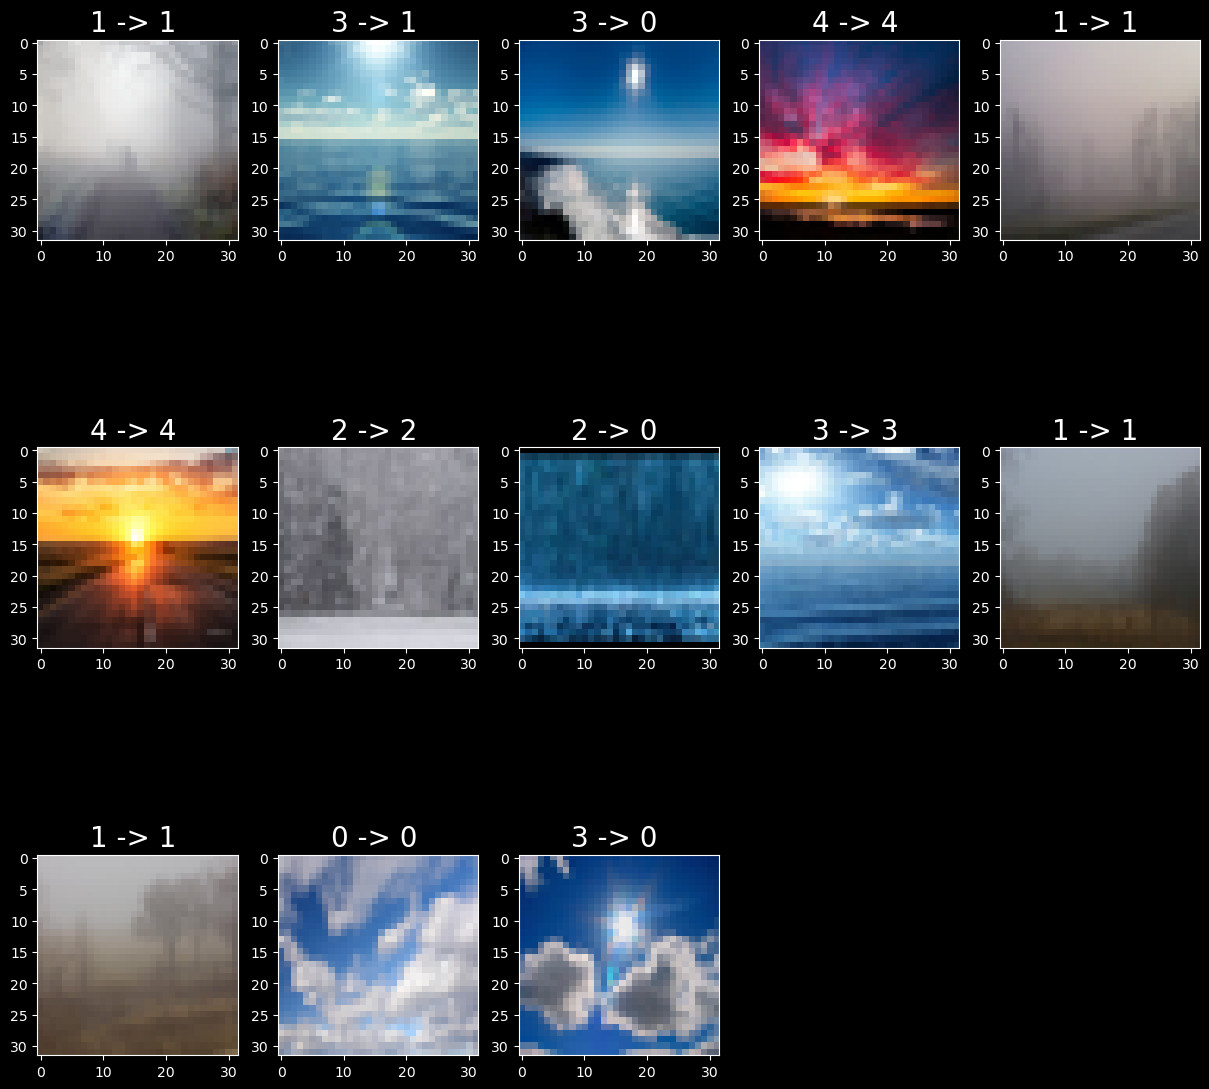

In [42]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_liblinear.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

**solver = "sag"**

In [43]:
lgr_sag = LogisticRegression(solver="sag")
lgr_sag.fit(train_x, train_y)
print(test_y)
print(lgr_sag.predict(test_x))
print(lgr_sag.score(test_x, test_y))

[1 3 3 4 1 4 2 2 3 1 1 0 3]
[1 1 3 4 1 4 2 0 3 1 1 0 0]
0.7692307692307693


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


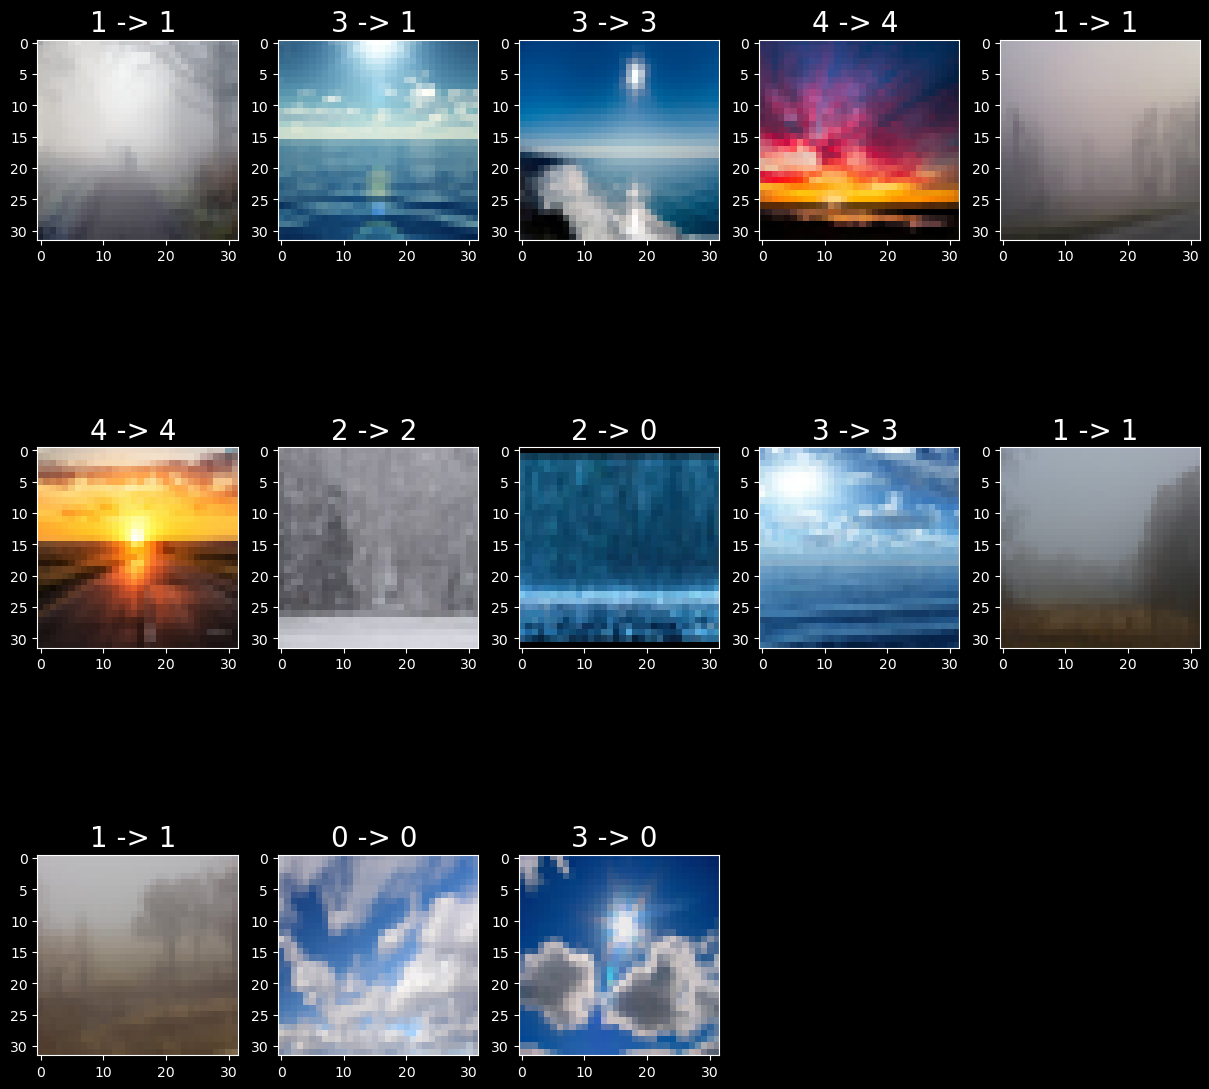

In [44]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_sag.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

**solver = "saga"**

In [45]:
lgr_saga = LogisticRegression(solver="saga")
lgr_saga.fit(train_x, train_y)
print(test_y)
print(lgr_saga.predict(test_x))
print(lgr_saga.score(test_x, test_y))

[1 3 3 4 1 4 2 2 3 1 1 0 3]
[1 1 3 4 1 4 2 0 3 1 1 0 0]
0.7692307692307693


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


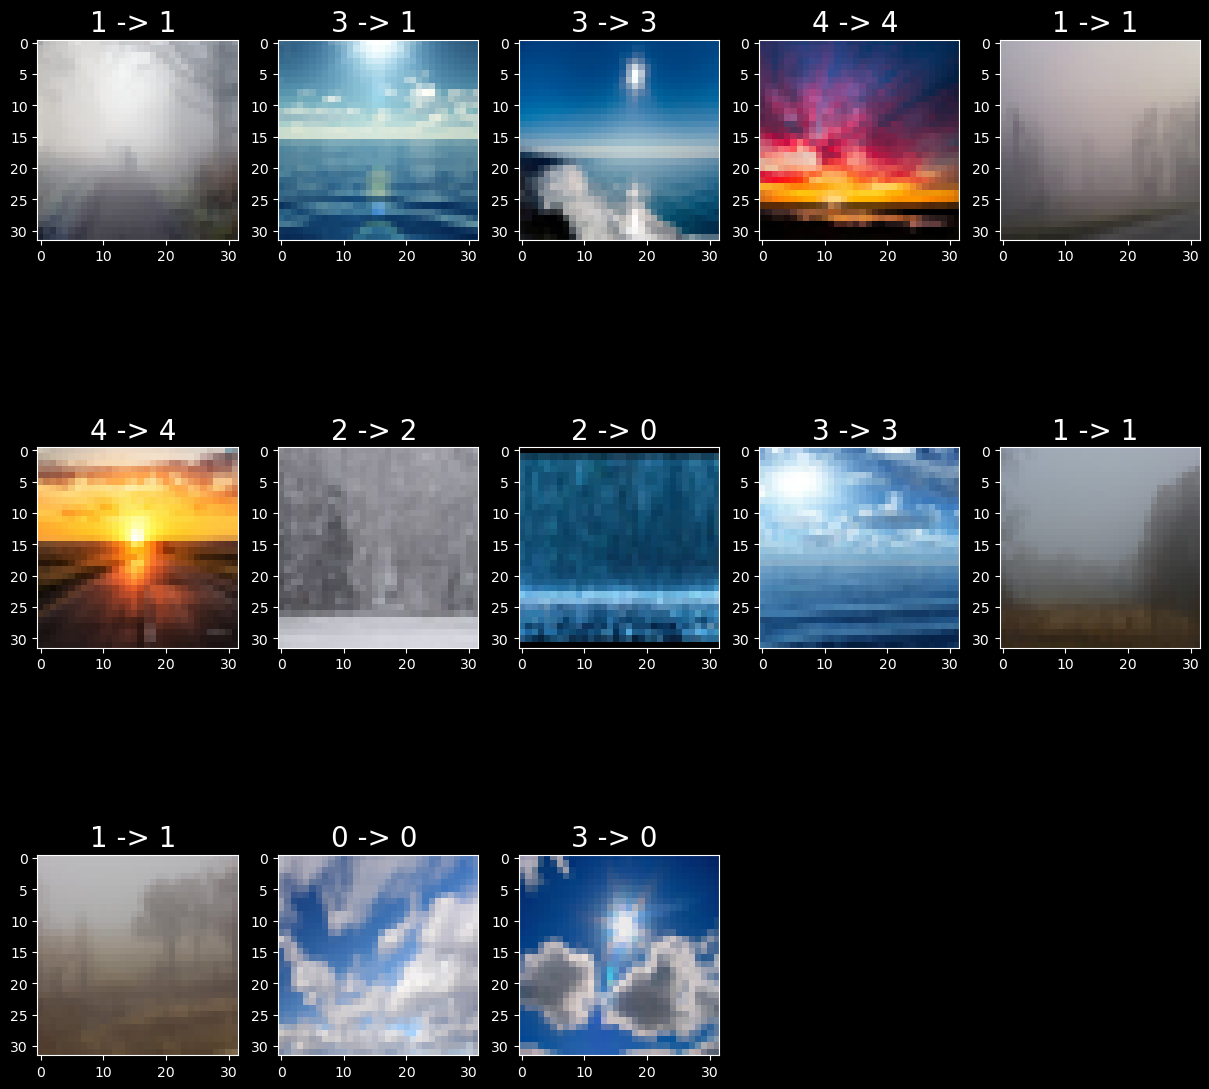

In [46]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_saga.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
print(test_y)
print(dtc.predict(test_x))
print(dtc.score(test_x, test_y))

[1 3 3 4 1 4 2 2 3 1 1 0 3]
[1 1 3 4 1 4 2 3 0 1 1 0 2]
0.6923076923076923


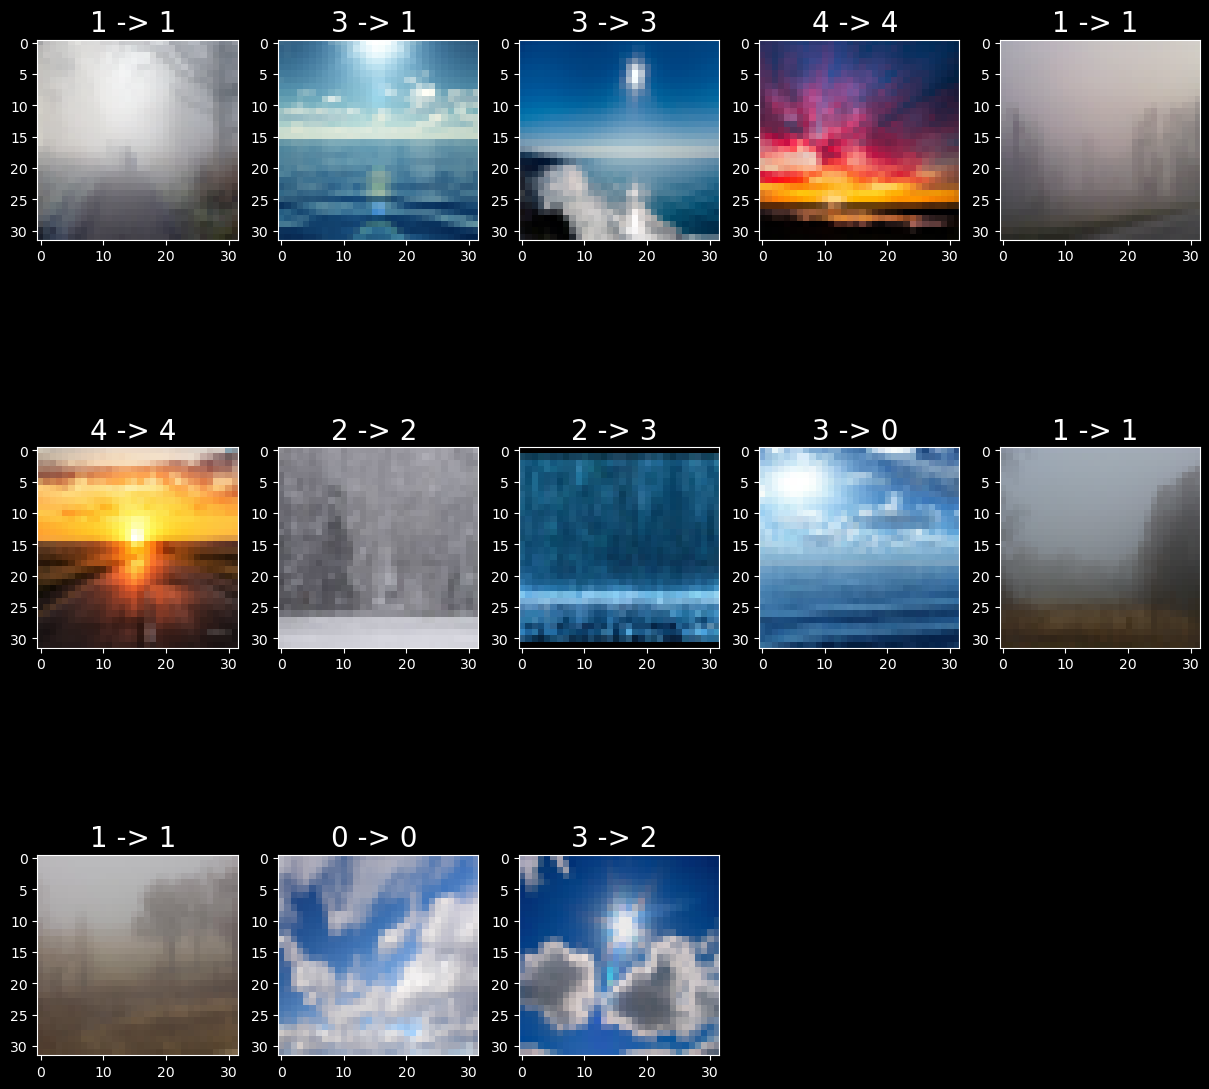

In [49]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, dtc.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
print(test_y)
print(rfc.predict(test_x))
print(rfc.score(test_x, test_y))

[1 3 3 4 1 4 2 2 3 1 1 0 3]
[1 3 0 4 1 4 2 2 0 1 1 0 2]
0.7692307692307693


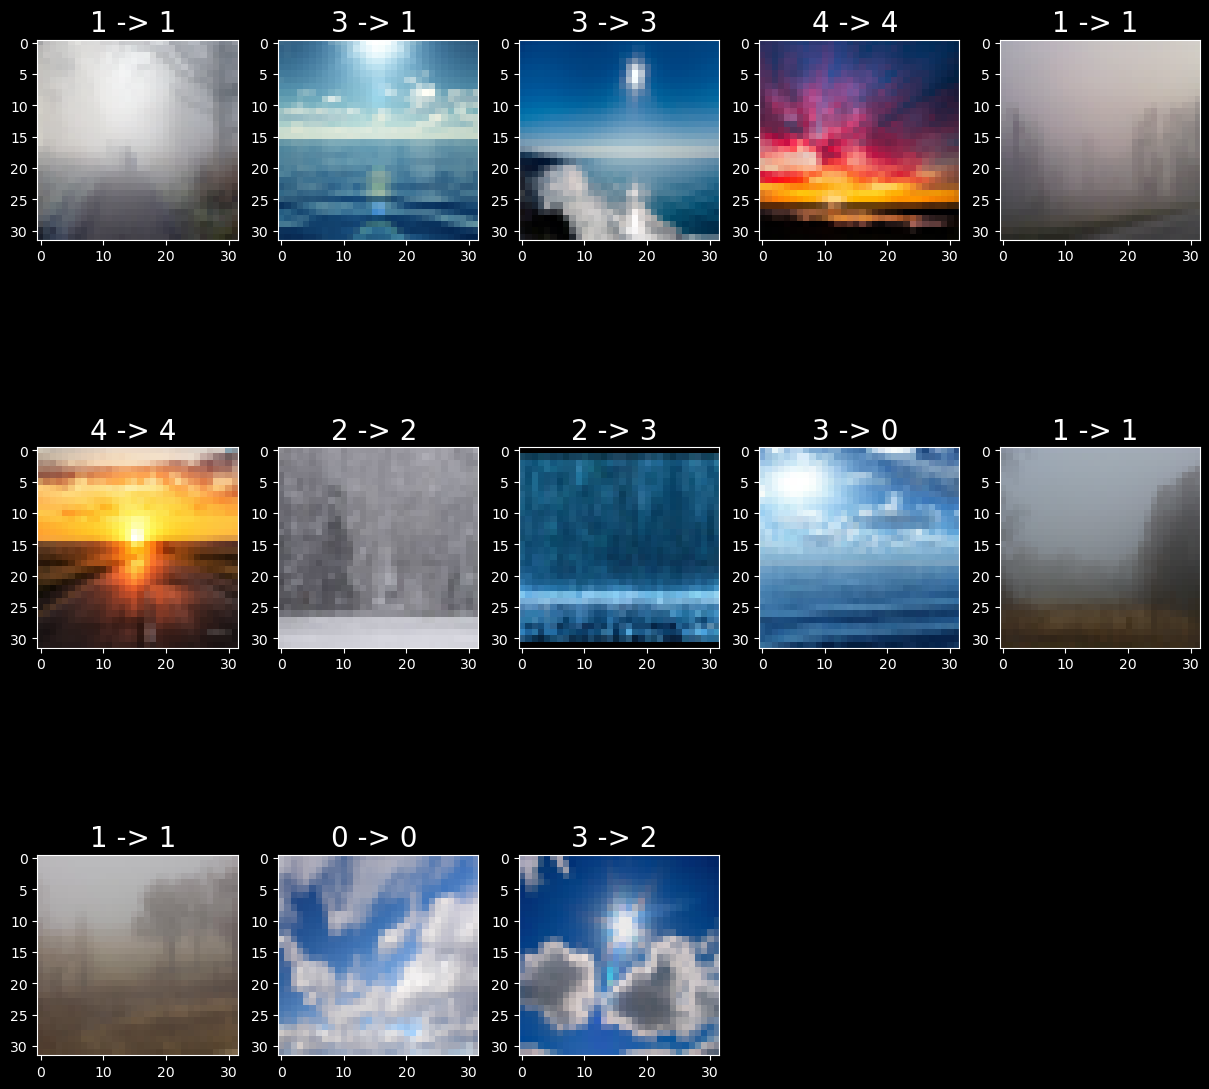

In [52]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, dtc.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# Support Vector Machine (SVM)